$$F=ma, F=-bv$$
- $F$ force
- $m$ mass
- $a$ acceleration (we only care about after boost)
- $-b$ aerodynamic factor
- $v$ velocity

Parabola don't work :(

Fitting a parabola is finding the gravity force youre feeling
When fitting real world data, see drag, say wow gravity is pretty strong right here. ill fit to that 
oh no, im predicting a higher $g$ than there actually is, im now predicting that we'll have a lower apogee.

We gotta take into account that we're feeling drag and that that is a changing amount


Runge-Kutta methodssss
Air resistance equation:

$ \frac{d^2A}{dt^2} = g - \frac{b}{m} (\frac{dA}{dt})^2$ 

- $g$ = gravity
- $b$ = drag stuff
- $m$ = mass of rocket
- $A$ = altitude

Saurez, Damian. “Speech on air” Deployment mod meeting, 21 Aug. 2024, His apartment, Iowa. Keynote Address.

https://math.stackexchange.com/questions/4846362/how-to-fit-an-ode-to-data


In [2]:
import numpy as np

In [3]:
def f(y, t):
    return np.array([y[1], -t / (t**2 + 4)**1.5])

def rk4_step(y, t, h):

    k1 = h * f(y, t)
    k2 = h * f(0.5 * k1 + y, 0.5 * h + t)
    k3 = h * f(0.5 * k2 + y, 0.5 * h + t)
    k4 = h * f(k3 + y, h + t)

    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6., t + h

def integrate(tmax, h):
    T = [0]
    X = [1]
    V = [-0.5]

    y = np.array([X[0], V[0]])
    t = T[0]
    for k in range(int(tmax / h)):

        y, t = rk4_step(y, t, h)

        X.append(y[0])
        V.append(y[1])
        T.append(t)

    return np.array(T), np.array(X), np.array(V)

In [4]:
tmax = 10
h = 0.2
t, x, v = integrate(tmax, h)

In [5]:
import matplotlib.pyplot as plt

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

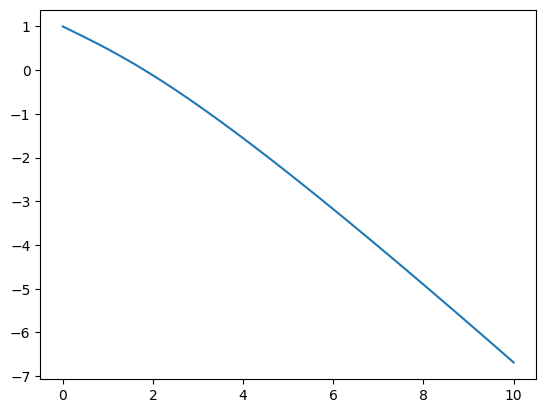

In [13]:
plt.plot(t, x)
plt.plot(t, f([0,0],t))
plt.show()
plt.plot(t,v)
plt.show()